# Online retail clustering analysis

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
# Source: Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33
url = 'https://github.com/kjellrkri/Portfolio/raw/main/Online%20Retail/OnlineRetail.xlsx'

# Specify the engine as 'openpyxl' since the file is in .xlsx format
df = pd.read_excel(url, engine='openpyxl')

# Check the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape
print(f'The DataFrame has {num_rows} rows and {num_columns} columns.')

# Display the first few rows of the DataFrame
df.head()

The DataFrame has 541909 rows and 8 columns.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory Data Analysis

In [2]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# Generate descriptive statistics for the "Quantity" and "UnitPrice" (price) columns simultaneously
specific_stats = df[['Quantity', 'UnitPrice']].describe()

# Display descriptive statistics for the specified columns
print("Descriptive statistics for the 'Quantity' and 'UnitPrice' (price) columns:")
print(specific_stats)

Descriptive statistics for the 'Quantity' and 'UnitPrice' (price) columns:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


- **Quantity**:
  - **Count**: There are 541,909 non-null entries in the 'Quantity' column, indicating that there are no missing values.
  - **Mean**: The mean quantity of items purchased per transaction is approximately 9.55. This suggests that, on average, each transaction involves purchasing around 9.55 items.
  - **Standard Deviation**: The standard deviation of the quantity is relatively high at 218.08, indicating a wide variation in the number of items purchased across transactions.
  - **Minimum and Maximum**: The minimum quantity is -80,995, and the maximum quantity is 80,995. The presence of negative quantities and extremely high maximum quantity might indicate anomalies or errors in the data that require further investigation.
  - **Percentiles**: The 25th, 50th (median), and 75th percentiles indicate that 25% of transactions involve purchasing 1 item or fewer, 50% involve purchasing 3 items or fewer, and 75% involve purchasing 10 items or fewer.

- **UnitPrice (Price)**:
  - **Count**: There are 541,909 non-null entries in the 'UnitPrice' column, indicating that there are no missing values.
  - **Mean**: The mean unit price is approximately 4.61. This suggests that, on average, the unit price of items purchased is around 4.61.
  - **Standard Deviation**: The standard deviation of the unit price is relatively high at 96.76, indicating a wide variation in unit prices across items.
  - **Minimum and Maximum**: The minimum unit price is -11,062.06, and the maximum unit price is 38,970.00. The presence of negative unit prices and extremely high maximum unit price might indicate anomalies or errors in the data that require further investigation.
  - **Percentiles**: The 25th, 50th (median), and 75th percentiles indicate that 25% of items have a unit price of 1.25 or less, 50% have a unit price of 2.08 or less, and 75% have a unit price of 4.13 or less.


### Dropp redundant columns

In [4]:
# Drop the redundant columns "InvoiceNo" and "StockCode"
df = df.drop(columns=['InvoiceNo', 'StockCode'])

# Display the DataFrame after dropping the redundant columns
print("\nDataFrame after dropping the redundant columns:")
df.head()


DataFrame after dropping the redundant columns:


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Handle missing values

In [5]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


135080 of the 541909, or about 25% of the rows contain missing values in the column CustomerID. Although this is a substantial amount we can not interpolate new IDs which would scew the results. Dropping the missing rows is therefore reasonable.

In [6]:
# Drop missing values from the DataFrame (overwrite the original DataFrame)
df.dropna(inplace=True)

# Display the DataFrame after dropping missing values
print("\nDataFrame after dropping missing values:")
df.head()


DataFrame after dropping missing values:


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Handle datatypes

In [7]:
# Display the data types of the columns
print("Data types of the columns:")
df.dtypes

Data types of the columns:


Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
# Convert "Description" and "Country" columns to string data type (str)
df['Description'] = df['Description'].astype('string')
df['Country'] = df['Country'].astype('string')

# Convert "CustomerID" column to integer data type (int) for memory efficiency
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce', downcast='integer')

# Display the DataFrame after converting data types
print("\nDataFrame after converting data types:")
print(df.dtypes)


DataFrame after converting data types:
Description            string
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int16
Country                string
dtype: object


### Clean the data

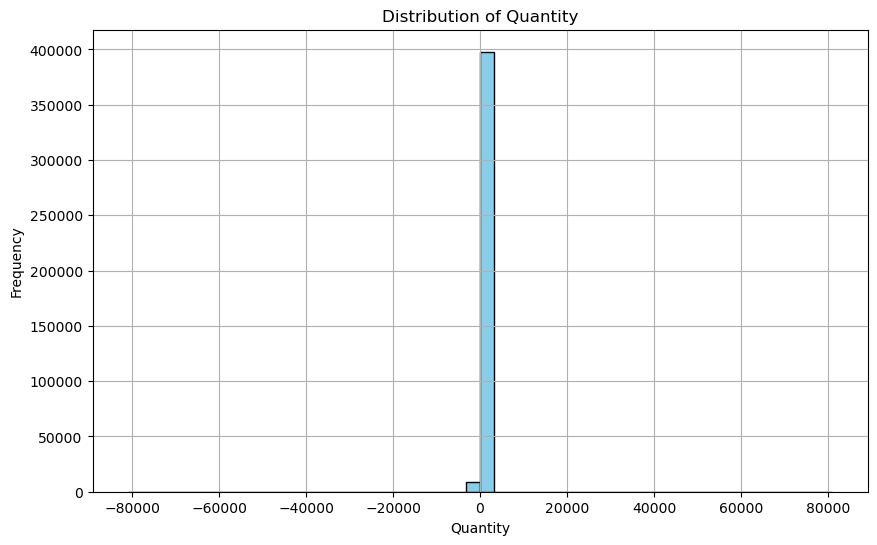

In [9]:
import matplotlib.pyplot as plt

# Plot distribution of 'Quantity'
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

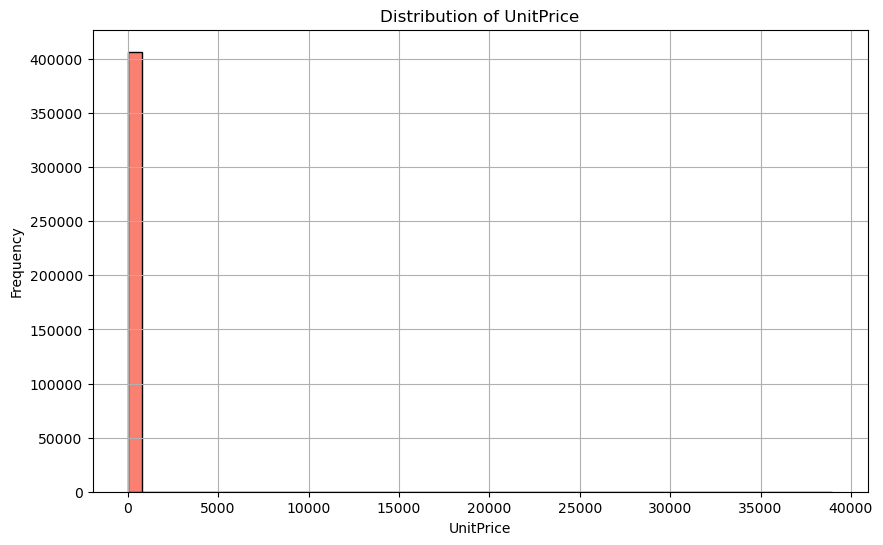

In [10]:
# Plot distribution of 'UnitPrice'
plt.figure(figsize=(10, 6))
plt.hist(df['UnitPrice'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()